In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')
sample=pd.read_excel('Sample_submission.xlsx')

In [3]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


train dataset has 10683 rows and 11 columns

In [4]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Test dataset has 2671 rows and 10 columns

In [5]:
sample

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [6]:
#We will combine train and test data for better Analysis
train['source']='train'
test['source']='test'
test['Price']=0

#Concatenating the data in df variable
df=pd.concat([train,test],sort=False,ignore_index=True)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train


In [8]:
df.shape

(13354, 12)

Dataframe has 13354 rows and 12 columns

In [9]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1871
source                2
dtype: int64

There are no identifier or constant columns

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
source             0
dtype: int64

There are 2 null values

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
source             object
dtype: object

All the features of the dataframe is of object type except for the price column

# Data Cleaning

##### Departure Time

In [12]:
#Converting Departure time to fatetime format
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [13]:
#extracting hour and minutes 
df['Dep_Hour']=df['Dep_Time'].dt.hour
df['Dep_Min']=df['Dep_Time'].dt.minute

In [14]:
df.drop('Dep_Time',axis=1,inplace=True)

##### Duration

In [15]:
#Completing the values of duration column
def complete(x):
    if 'h' not in x:
        x='00h '+x
    elif 'm' not in x:
        x=x+' 00m'
    return x

df['Duration']=df['Duration'].apply(complete)

In [16]:
#Retireving hour and mins
def hour(x):
    h=x.split('h')[0]
    return int(h)

def mins(x):
    m=x.split()[1]
    m=m[:-1]
    return int(m)


df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_minutes']=df['Duration'].apply(mins)

In [17]:
#converting hour and minutes to minutes
df['Duration_mins']=(df['Duration_hours']*60)+df['Duration_minutes']

In [18]:
df.drop(['Duration_hours','Duration_minutes','Duration'],axis=1,inplace=True)

# EDA

### Univariate Analysis

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

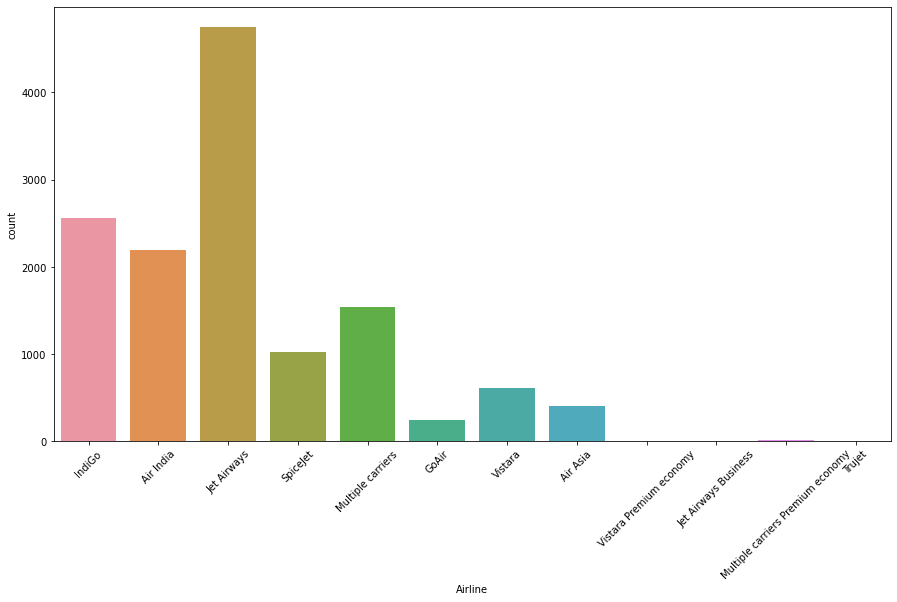

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='Airline',data=df)
plt.xticks(rotation=45)
df['Airline'].value_counts()

Jet Airways have the highest no. of flights followed by Indigo and Air India

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

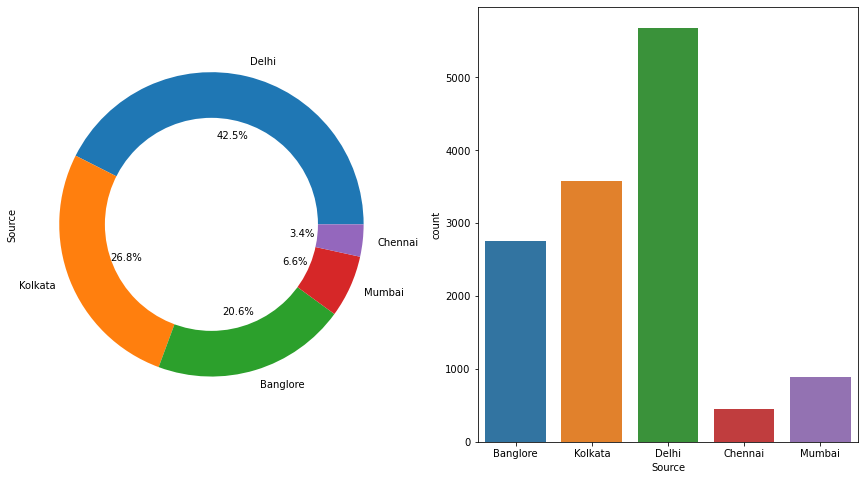

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Source'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Source',data=df)
df['Source'].value_counts()

Highest flghts have their source destination as Delhi and least is Chennai

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

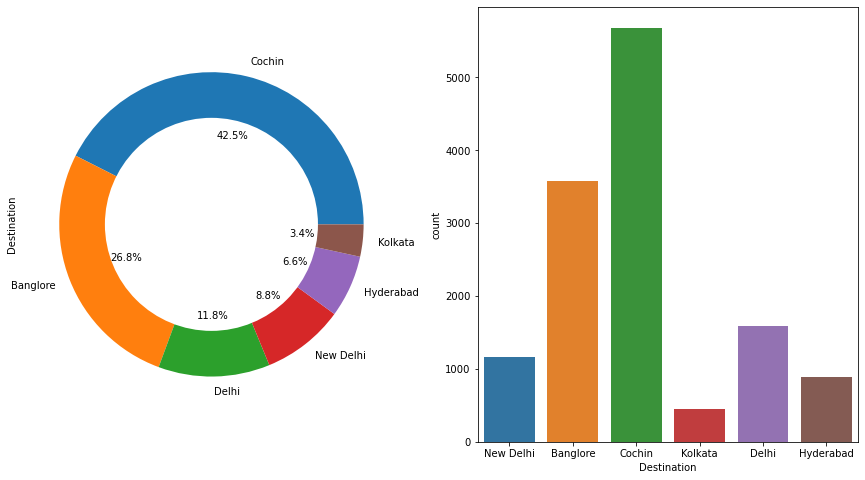

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Destination',data=df)
df['Destination'].value_counts()

Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

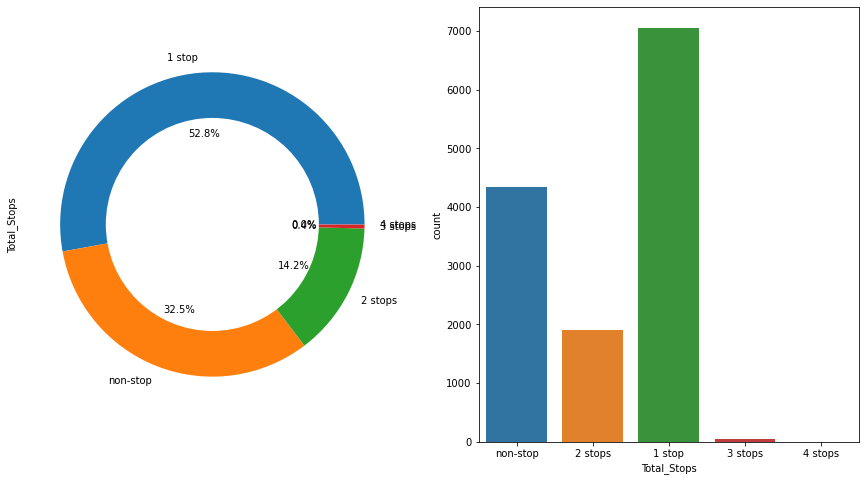

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Total_Stops',data=df)
df['Total_Stops'].value_counts()

Majority of flights have 1 stop while there are few flights with even 3 and 4 stops,

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

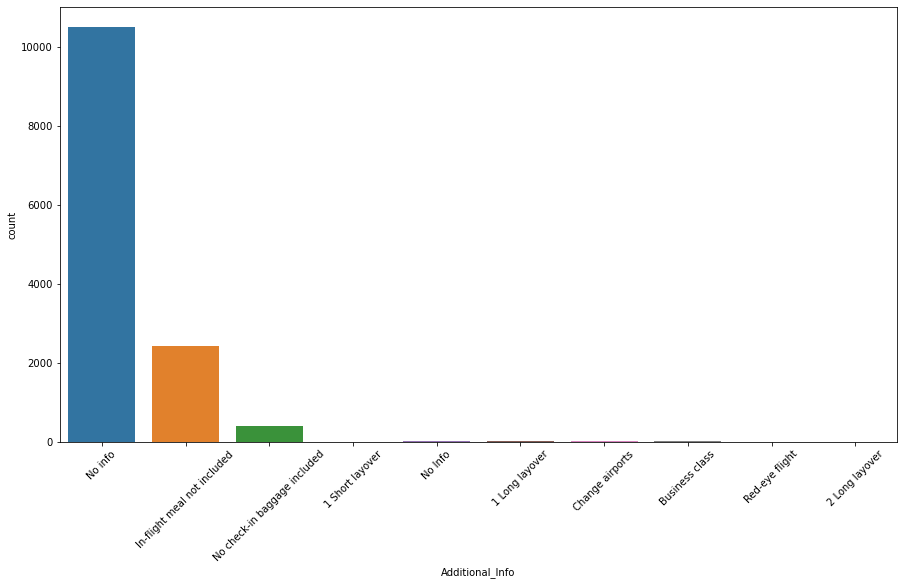

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x='Additional_Info',data=df)
plt.xticks(rotation=45)
df['Additional_Info'].value_counts()

Majority of the flights do not provide additional info, whereas dome proved information such as In-flight meal not included, Bussiness class which colud be helpful in determining the price of the flight.

DEL → BOM → COK    3000
BLR → DEL          1941
CCU → BOM → BLR    1232
CCU → BLR           896
BOM → HYD           785
Name: Route, dtype: int64

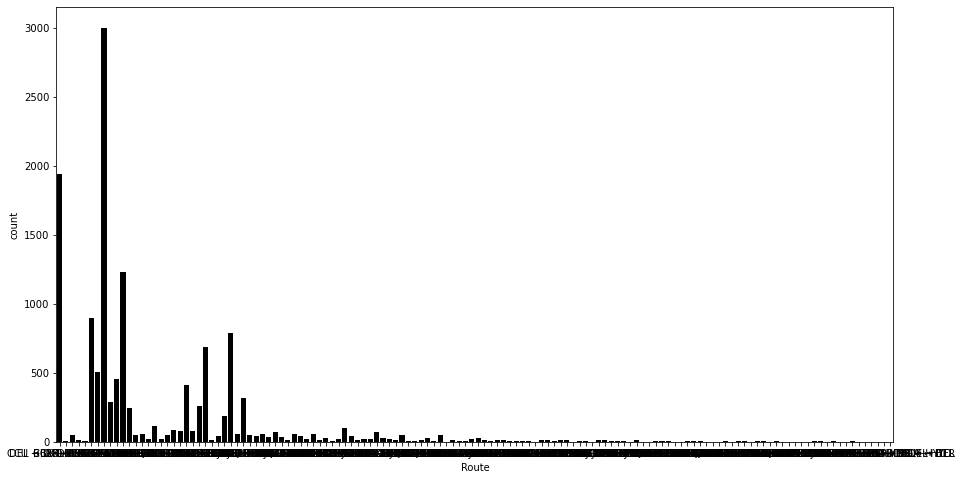

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(df['Route'],color='k')
df['Route'].value_counts().head()

DEL → BOM → COK and BLR → DEL seems to be the busiest route, while there are only 6 routes which is taken by more than 500 flights.

Minimum 0
Maximum 79512


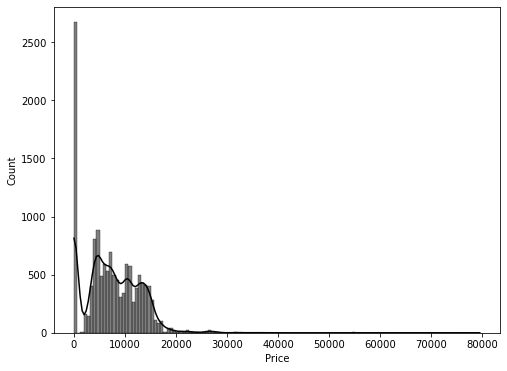

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Price'],kde=True,color='k')
print('Minimum',df['Price'].min())
print('Maximum',df['Price'].max())

The minimum price if a flight is 0 which is out of the box. Most of the price for flights lie in the range 3000 to 18000, while the highest price if 79512.

In [26]:
df[df['Price']==0]

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,source,Dep_Hour,Dep_Min,Duration_mins
10683,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,0,test,17,30,655
10684,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,0,test,6,20,240
10685,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,0,test,19,15,1425
10686,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,21:00,1 stop,No info,0,test,8,0,780
10687,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,02:45 25 Jun,non-stop,No info,0,test,23,55,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,1 stop,No info,0,test,20,30,1435
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,16:55,non-stop,No info,0,test,14,20,155
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,1 stop,No info,0,test,21,50,395
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,No info,0,test,4,0,915


There is nothing unsusal where price is zero.

Minimum 5
Maximum 2860


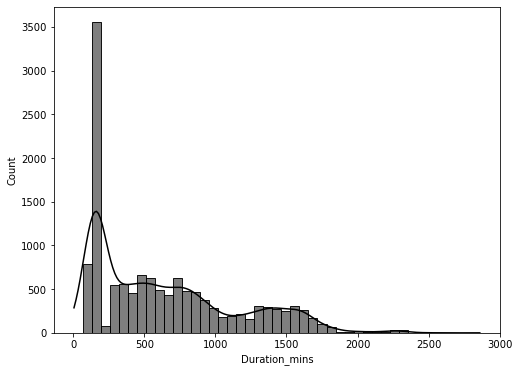

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(df['Duration_mins'],kde=True,color='k')
print('Minimum',df['Duration_mins'].min())
print('Maximum',df['Duration_mins'].max())

Minimum time taken by a flight is 5 mins while highest is 2860 mins. majority of the flights take time below 250 minutes.

### Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

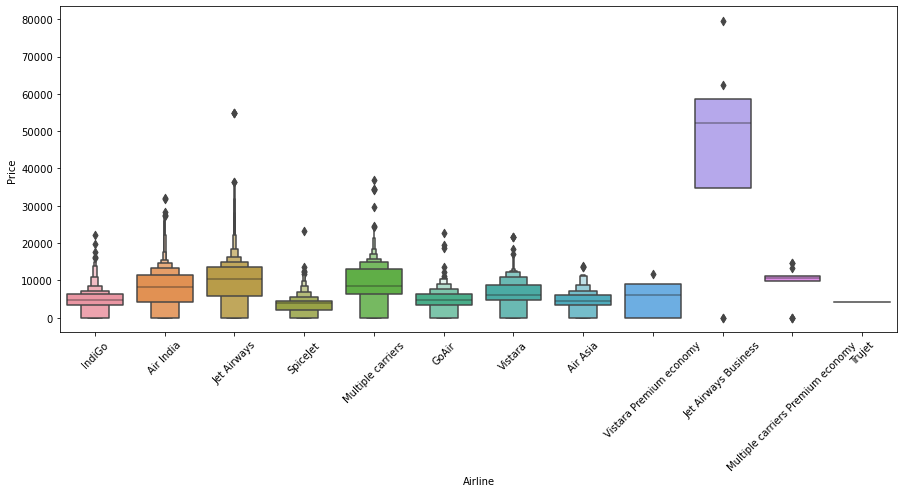

In [28]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=45)

Jet Airways Business have the highest price followed by jet airways, Air india and Multiple carriers.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

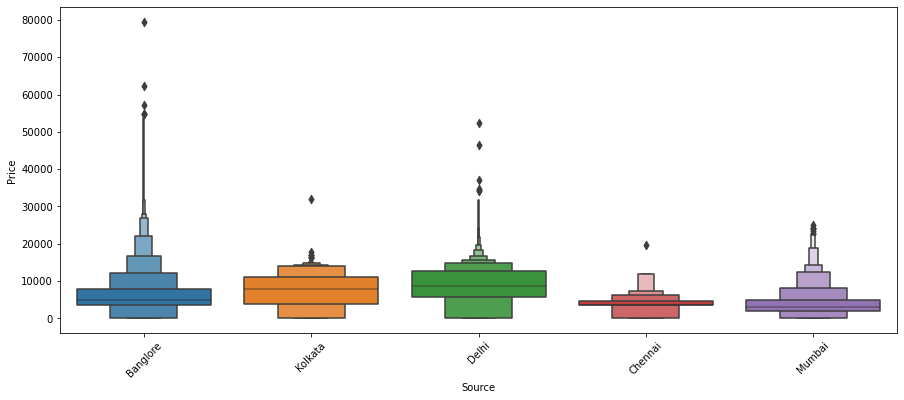

In [29]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Source',y='Price',data=df)
plt.xticks(rotation=45)

Delhi source has the highest mean price for flight while there are some outliers in baglore source where the price is greater than 50000

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

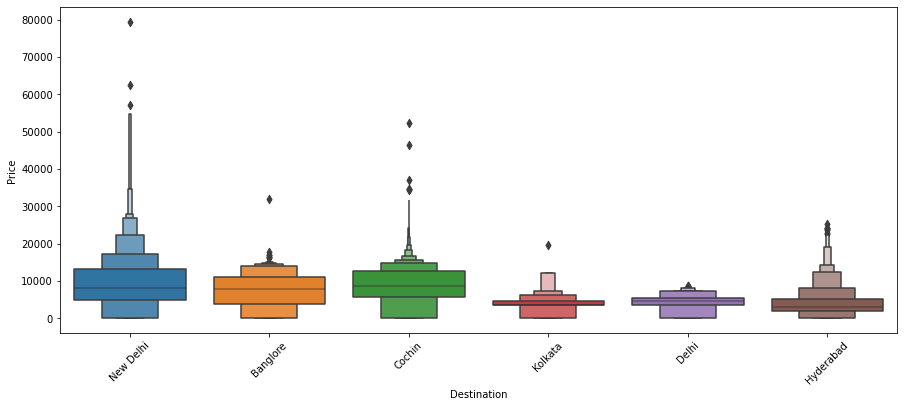

In [30]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Destination',y='Price',data=df)
plt.xticks(rotation=45)

Cochin destination has the highest price followed by delhi, where some flight tickets are even greater than 70000

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

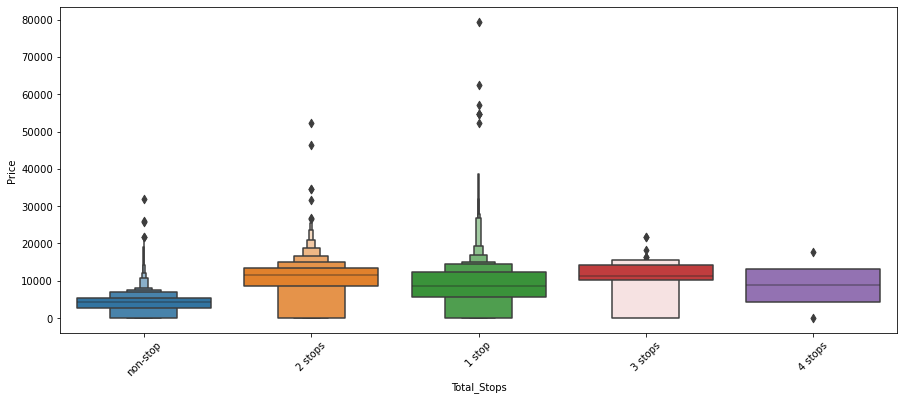

In [31]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Total_Stops',y='Price',data=df)
plt.xticks(rotation=45)

Flights where the number of stops are 2 have the highest flight ticket price.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

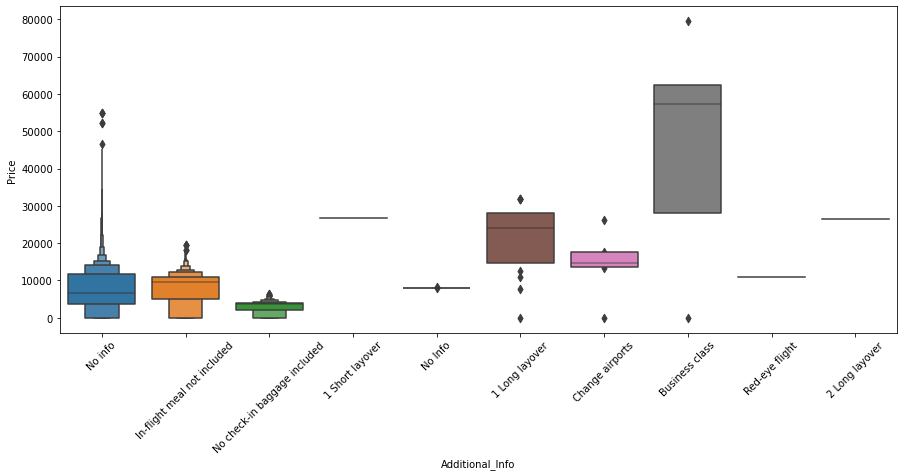

In [32]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Additional_Info',y='Price',data=df)
plt.xticks(rotation=45)

Flight price is higheer where the additional info contains Bussiness class followed by 1 long layover or 1 short/long layover.

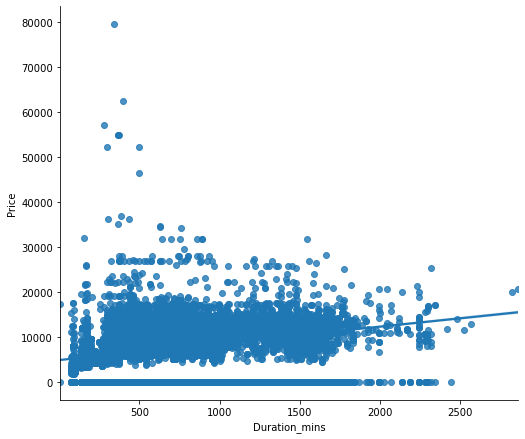

In [33]:
sns.lmplot(x='Duration_mins',y='Price',data=df,height=6, aspect=1.2)

As the duration of minutes increases Flight price also increases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

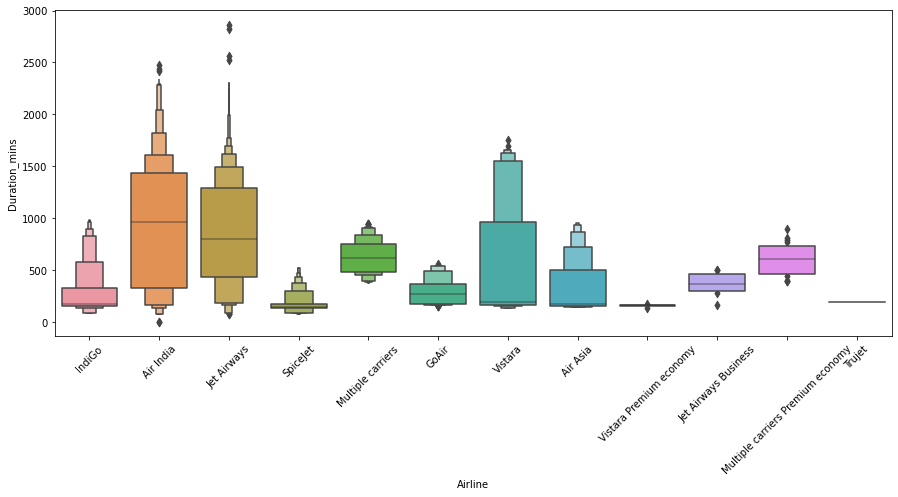

In [34]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Airline',y='Duration_mins',data=df)
plt.xticks(rotation=45)

Air india flights take longest duration time while mean of Indigo flight has the lowes duration.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

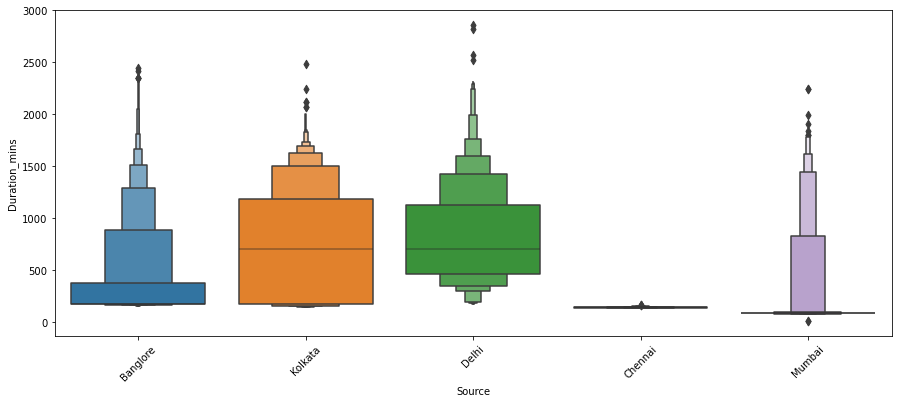

In [35]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Source',y='Duration_mins',data=df)
plt.xticks(rotation=45)

Flights having source from delhi and kolkata have the longest flight duration, while mumbai has the lowest mean.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

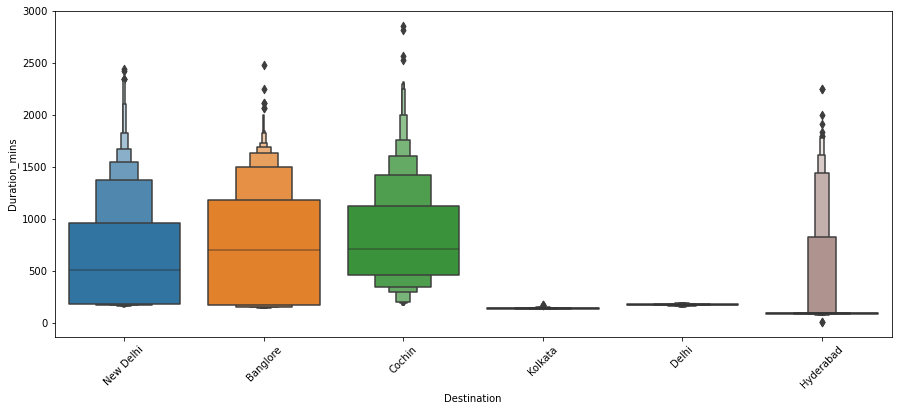

In [36]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Destination',y='Duration_mins',data=df)
plt.xticks(rotation=45)

Flights having destination as cochin and banglore have the longest flight duration, while hyderabad has the lowest mean flight duration.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

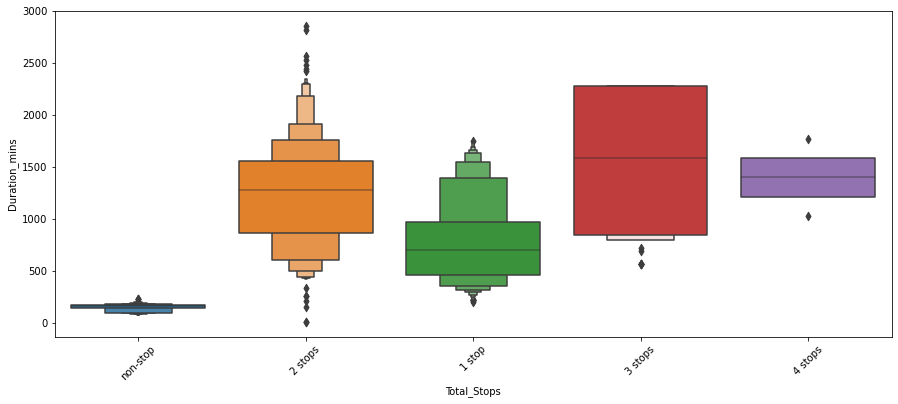

In [37]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Total_Stops',y='Duration_mins',data=df)
plt.xticks(rotation=45)

As the Duration time seem to increase flights take more no. of stops excluding 4 stops which seems to be an outlier.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

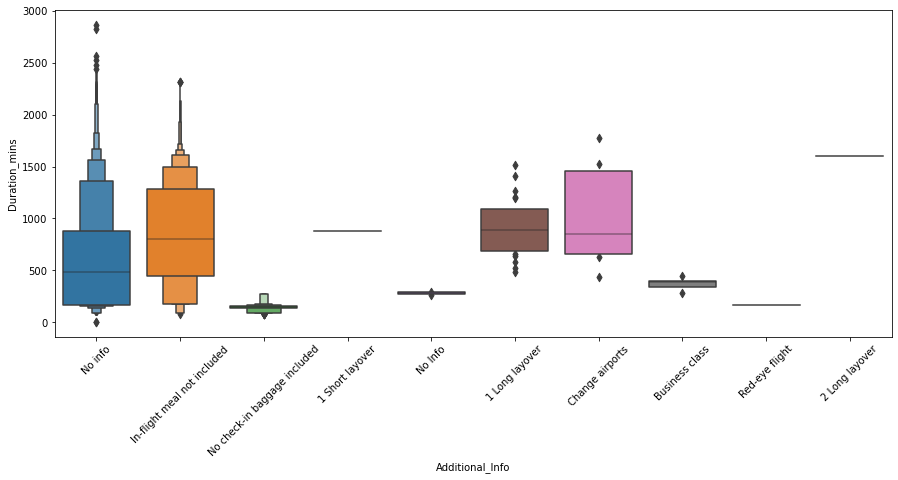

In [38]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Additional_Info',y='Duration_mins',data=df)
plt.xticks(rotation=45)

Flights informing 1 or 2 long layover take plenty duration, also where airports need to be changed.

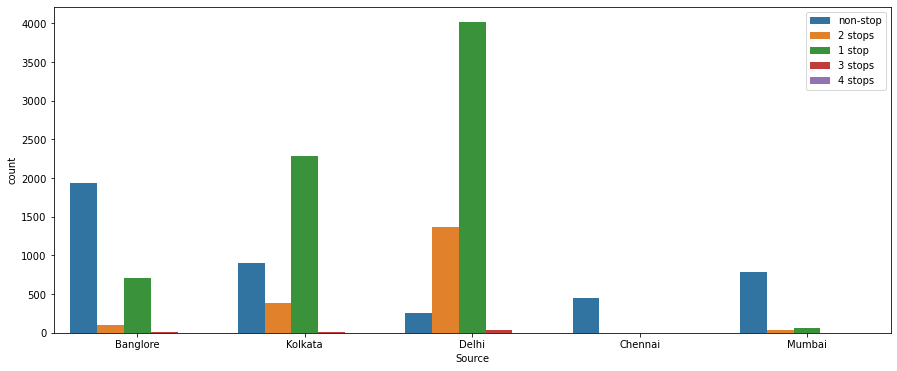

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(df['Source'],hue='Total_Stops',data=df)
plt.legend(loc='upper right')

Banglore is the only source of flights where the most of the flights have no stops. Almost all the flights from chennai have no stops.

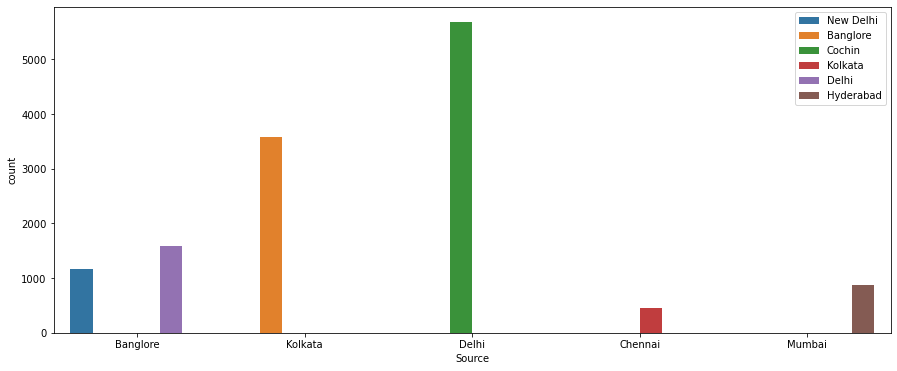

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(df['Source'],hue='Destination',data=df)
plt.legend(loc='upper right')

All the flights boarding from delhi have there destination at cochin, while kolkata has banglore, cheenai has kolkata,mumbai has hyderabad and banglore has delhi.

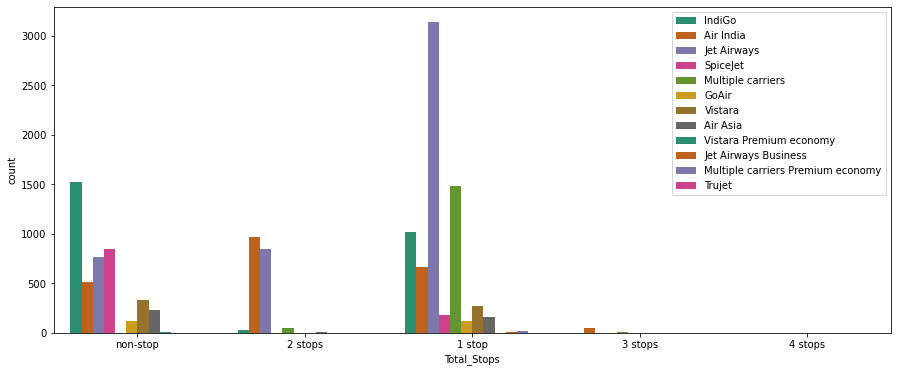

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(df['Total_Stops'],hue='Airline',data=df,palette='Dark2')
plt.legend(loc='upper right')

Multiple carrier airlines takes atleast 1 stop, while SPice jet do not take more than one stops. 3 and 4 stops are taken by very few airlines.

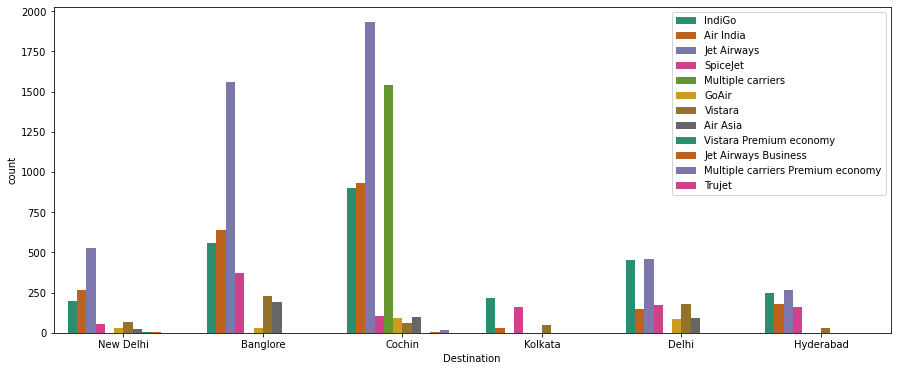

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(df['Destination'],hue='Airline',data=df,palette='Dark2')
plt.legend(loc='upper right')

Multiple only fly to Cochin as destination, Indigo and air india are the only airlines which have all the places as Destination.

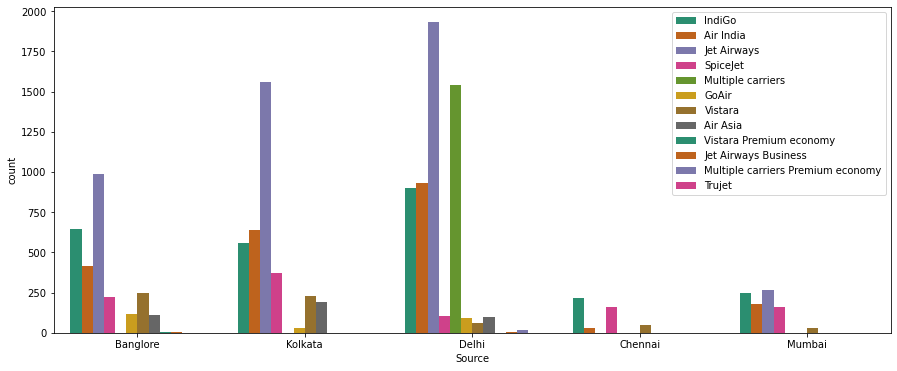

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(df['Source'],hue='Airline',data=df,palette='Dark2')
plt.legend(loc='upper right')

Very few airlines fly from Chennai while most airlines fly from delhi as source.

### Multivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

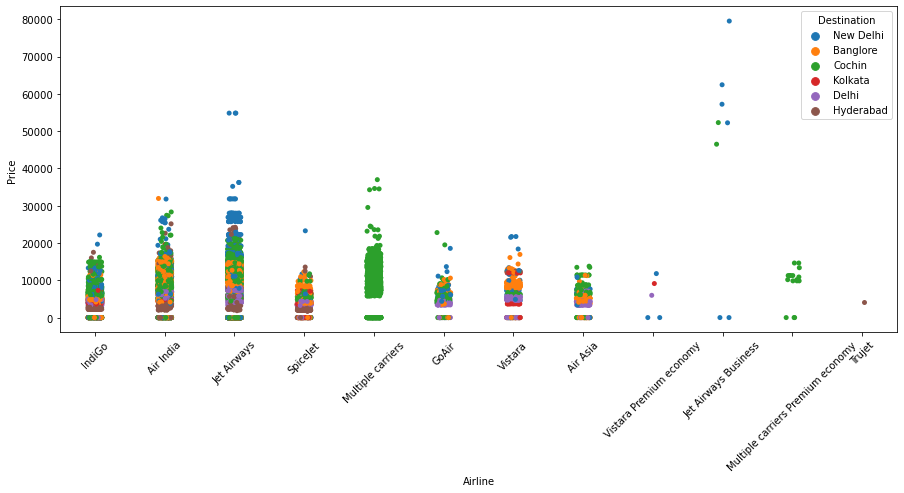

In [44]:
plt.figure(figsize=(15,6))
sns.stripplot(x='Airline',y='Price',hue='Destination',data=df)
plt.xticks(rotation=45)

Trujet only has one destination that is hyderabad.Highest price is charged by jet airways be it bussiness or not while having its destination as Delhi. Flights boarded from kolkata usually have less price be it any airlines.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

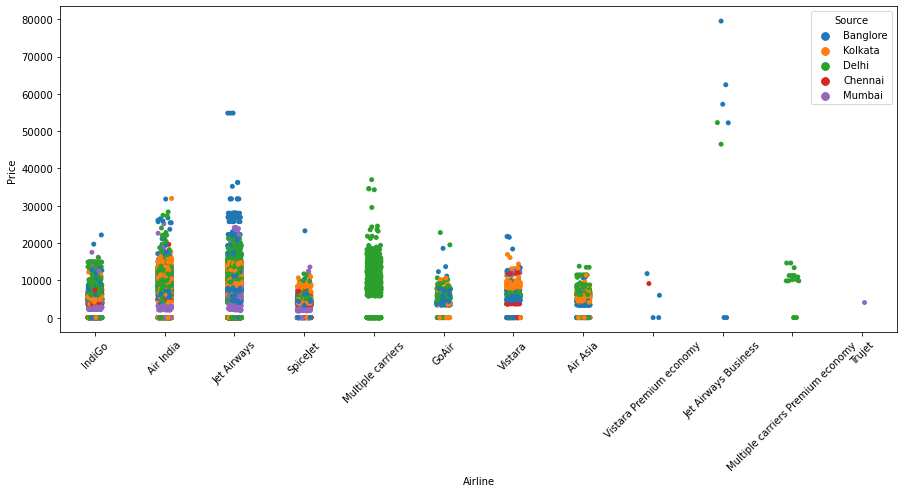

In [45]:
plt.figure(figsize=(15,6))
sns.stripplot(x='Airline',y='Price',hue='Source',data=df)
plt.xticks(rotation=45)

Trujet only has one destination that is Mumbai.Highest price is charged by jet airways be it bussiness or not while having its destination as Banglore. flights for mumbai are relatively cheaper be it any airlines.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

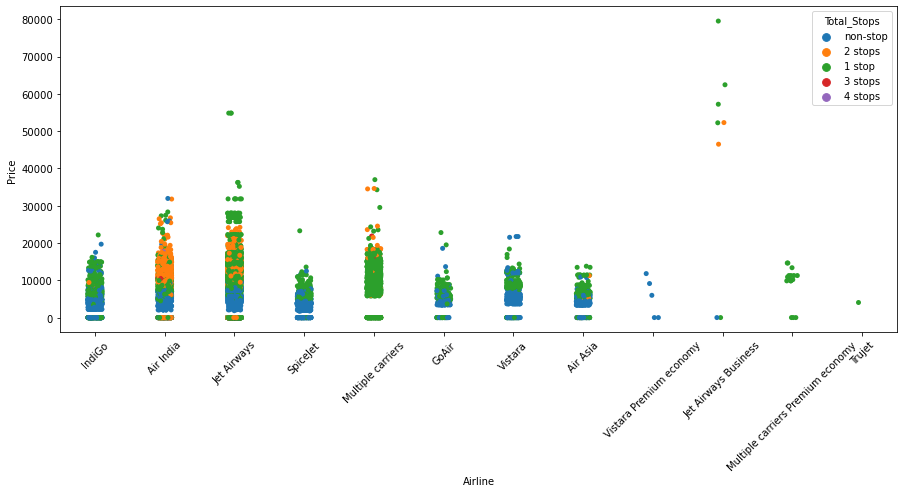

In [46]:
plt.figure(figsize=(15,6))
sns.stripplot(x='Airline',y='Price',hue='Total_Stops',data=df)
plt.xticks(rotation=45)

Jet airways taking onne or 2 stops has the highest price while flights taking no stops seem to be taking lowest price.

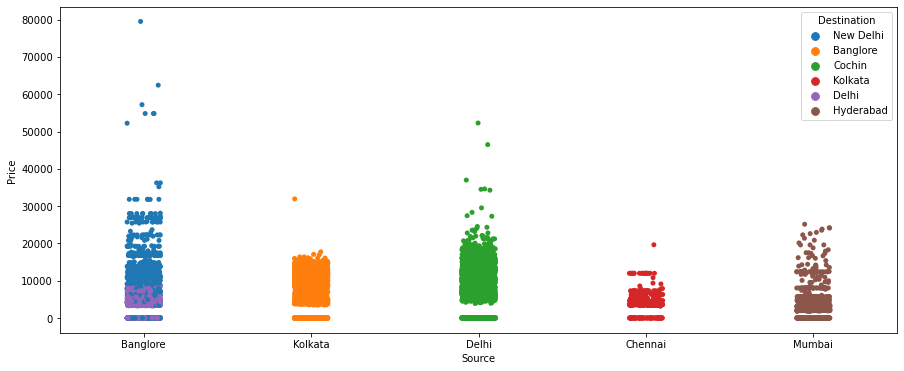

In [47]:
plt.figure(figsize=(15,6))
sns.stripplot(x='Source',y='Price',hue='Destination',data=df)

Flights having source as banglore and destination as delhi has the highest mean price followed by source as delhi and destination as Cochin.

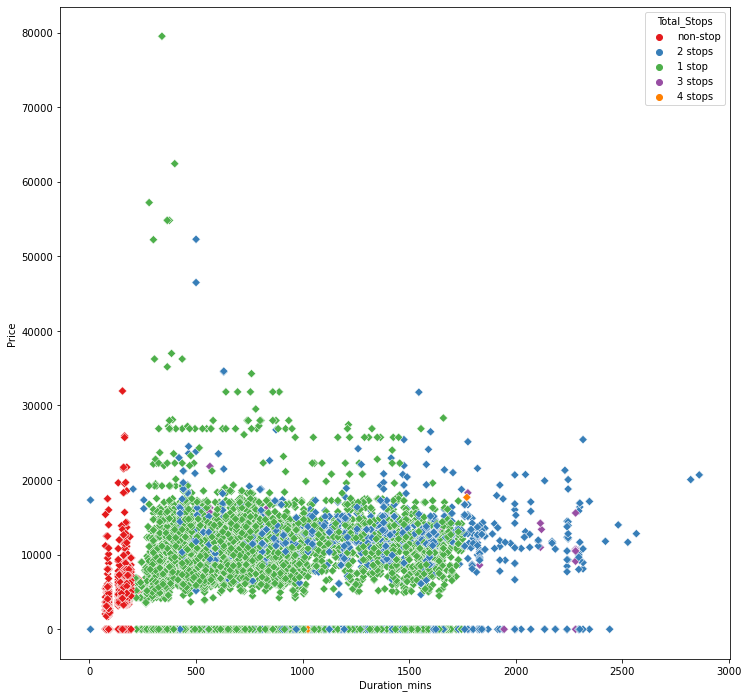

In [48]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Duration_mins',y='Price',hue='Total_Stops',data=df,marker='D',palette='Set1')

Non stops flights take less duration while their fare is also low, then as the stop increases,  duration also increases and price also increases,

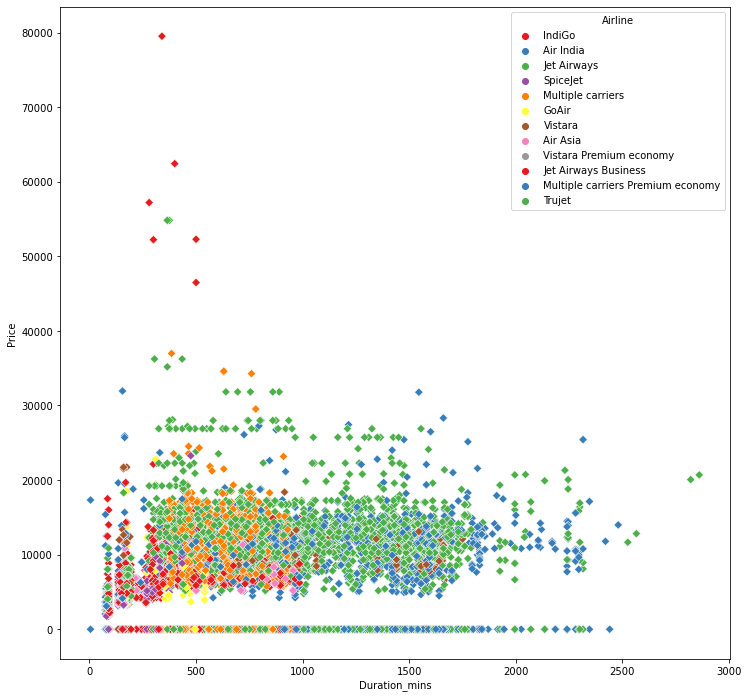

In [49]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Duration_mins',y='Price',hue='Airline',data=df,marker='D',palette='Set1')

Jet airways bussiness have the highest price even though its duration is less. while Multiple Carriers premium economy and jet airways charges less even when duration is much more 

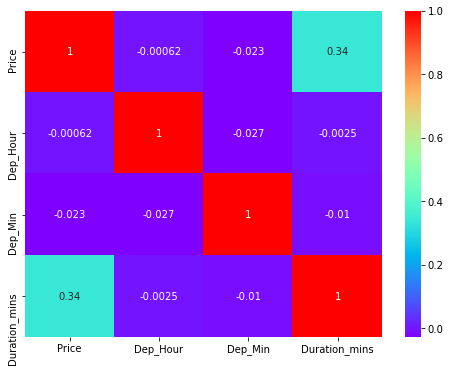

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

Price has positive correlation with duration_mins column, while there is no multicollinearity.

# Pre-processing Pipeline

##### Handling Date column

In [51]:
#Extracting year month and day from Date column
df['Journey_year']=pd.to_datetime(df['Date_of_Journey']).dt.year
df['Journey_month']=pd.to_datetime(df['Date_of_Journey']).dt.month
df['Journey_day']=pd.to_datetime(df['Date_of_Journey']).dt.day

In [52]:
df['Journey_year'].nunique()

1

Dropping year column as it is a constant

In [53]:
df.drop(['Date_of_Journey','Journey_year'],axis=1,inplace=True)

##### Dropping unnecessary columns

In [54]:
#We already have departure time and duration of flight so we dont need arrival time.
df.drop('Arrival_Time',axis=1,inplace=True)

##### Correcting ambiguous values in columns

In [55]:
#Delhi in destination column
df['Destination'].replace('New Delhi','Delhi',inplace=True)

In [56]:
#No info in Additional_Info column
df['Additional_Info'].replace('No Info','No info',inplace=True)

##### Imputing Null values

In [57]:
from scipy.stats import mode

In [58]:
df[df['Route'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Dep_Hour,Dep_Min,Duration_mins,Journey_month,Journey_day
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,train,9,45,1420,6,5


In [59]:
#Creating pivot table to help fill nan values of Route from here
table = df[df['Airline']=='Air India'].pivot_table(values='Route', index='Source', columns='Destination', aggfunc=mode)
table

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata
Source,,,,,
Banglore,NaN,NaN,"([BLR → DEL], [195])",NaN,NaN
Chennai,NaN,NaN,NaN,NaN,"([MAA → CCU], [30])"
Delhi,NaN,"([DEL → BOM → COK], [148])",NaN,NaN,NaN
Kolkata,"([CCU → BLR], [75])",NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,"([BOM → HYD], [126])",NaN


We fill the NAN value where Airline, Source and Destination are same as for missing value.

In [60]:
df['Route'].fillna('DEL → BOM → COK',inplace=True)

In [61]:
table = df[df['Airline']=='Air India'].pivot_table(values='Total_Stops', index='Source', columns='Destination', aggfunc=mode)
table

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata
Source,,,,,
Banglore,NaN,NaN,"([non-stop], [195])",NaN,NaN
Chennai,NaN,NaN,NaN,NaN,"([non-stop], [30])"
Delhi,NaN,"([2 stops], [468])",NaN,NaN,NaN
Kolkata,"([2 stops], [371])",NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,"([non-stop], [126])",NaN


We fill the NAN value where Airline, Source and Destination are same as for missing value.

In [62]:
df['Total_Stops'].fillna('1 stop',inplace=True)

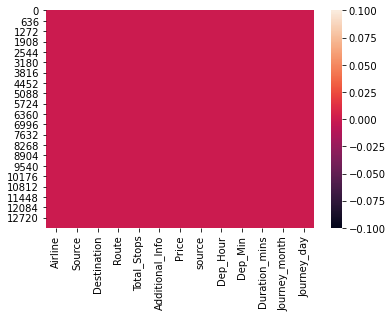

In [63]:
sns.heatmap(df.isnull())

##### Encoding Categorical Variables

In [64]:
#Encoding values explicitly as its order has meaning.
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [65]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [66]:
for i in df.columns:
    if df[i].dtypes=='O' and i!="source":
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))
        

##### Removing Skewness from Duration Mins column

0.8678825287039127


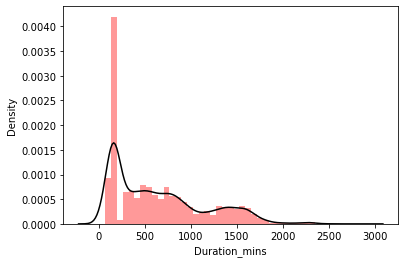

In [67]:
sns.distplot(df['Duration_mins'],color='r', kde_kws={"color": "k"})
print(df['Duration_mins'].skew())

In [68]:
df['Duration_mins']=np.log(df['Duration_mins'])

-0.18434417084102742


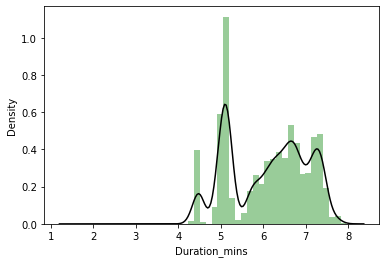

In [69]:
sns.distplot(df['Duration_mins'],color='g', kde_kws={"color": "k"})
print(df['Duration_mins'].skew())

Skewness has reduced.

##### Scaling the DataFrame

In [70]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [71]:
#Not scaling the source and price column
for i in df.columns:
    if i=='source' or i=='Price':
        pass
    else:
        df[i]=m.fit_transform(df[i].values.reshape(-1,1))

##### Separating the data frame into train and test

In [72]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [73]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Price'],axis=1,inplace=True)

In [74]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [75]:
train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Duration_mins,Journey_month,Journey_day
0,0.272727,0.00,0.50,0.137405,0.00,0.875,3897,0.956522,0.363636,0.555408,0.181818,0.875000
1,0.090909,0.75,0.00,0.664122,0.50,0.875,7662,0.217391,0.909091,0.706968,0.000000,0.083333
2,0.363636,0.50,0.25,0.931298,0.50,0.875,13882,0.391304,0.454545,0.855131,0.727273,0.125000
3,0.272727,0.75,0.00,0.725191,0.25,0.875,6218,0.782609,0.090909,0.657473,1.000000,0.083333
4,0.272727,0.00,0.50,0.221374,0.25,0.875,13302,0.695652,0.909091,0.636787,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,0.75,0.00,0.511450,0.00,0.875,4107,0.826087,1.000000,0.535694,0.727273,0.041667
10679,0.090909,0.75,0.00,0.511450,0.00,0.875,4145,0.869565,0.818182,0.540859,0.272727,1.000000
10680,0.363636,0.00,0.50,0.137405,0.00,0.875,7229,0.347826,0.363636,0.564410,0.272727,1.000000
10681,0.909091,0.00,0.50,0.137405,0.00,0.875,12648,0.478261,0.545455,0.545859,0.000000,0.000000


In [76]:
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Dep_Min,Duration_mins,Journey_month,Journey_day
0,0.363636,0.50,0.25,0.824427,0.25,0.875,0.739130,0.545455,0.767852,0.454545,0.125000
1,0.272727,0.75,0.00,0.717557,0.25,0.875,0.260870,0.363636,0.609721,1.000000,0.083333
2,0.363636,0.50,0.25,0.824427,0.25,0.625,0.826087,0.272727,0.890276,0.363636,0.750000
3,0.545455,0.50,0.25,0.824427,0.25,0.875,0.347826,0.000000,0.795361,0.363636,0.750000
4,0.000000,0.00,0.50,0.137405,0.00,0.875,1.000000,1.000000,0.555408,0.454545,0.875000
...,...,...,...,...,...,...,...,...,...,...,...
2666,0.090909,0.75,0.00,0.580153,0.25,0.875,0.869565,0.545455,0.891378,0.454545,0.125000
2667,0.272727,0.75,0.00,0.511450,0.00,0.875,0.608696,0.363636,0.540859,0.181818,1.000000
2668,0.363636,0.50,0.25,0.824427,0.25,0.875,0.913043,0.909091,0.688195,0.454545,0.000000
2669,0.090909,0.50,0.25,0.824427,0.25,0.875,0.173913,0.000000,0.820503,0.454545,0.000000


In [77]:
#Separating dependent and independent variables from Dataframe
x=train.copy()
x.drop('Price',axis=1,inplace=True)
y=train['Price']

# Modelling Phase

Importing necessary libraries

In [78]:
from sklearn.model_selection import train_test_split,cross_val_score

In [79]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [80]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [81]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [82]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [83]:
def createmodels(model_list,xtrain,xtest,ytrain,ytest,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(m,x,y,scoring='r2',cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data.set_index('Model',inplace = True)
    return data        

In [84]:
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [85]:
print('---------------------------------------Performance of Training Data--------------------------------------------')
createmodels(models,xtrain,xtrain,ytrain,ytrain,names)

---------------------------------------Performance of Training Data--------------------------------------------


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
Model,,,,
KNeighborsRegressor,1126.7012,3.985647e+06,1996.4084,0.77
LinearRegression,2434.5039,1.251244e+07,3537.2921,-0.31
Lasso,2433.6608,1.251286e+07,3537.3518,-0.32
Ridge,2434.1728,1.251261e+07,3537.3166,-0.32
DecisionTreeRegressor,37.7978,8.070822e+04,284.0919,1.00
RandomForestRegressor,273.1955,5.008913e+05,707.7367,0.98
AdaBoostRegressor,3655.2802,1.886821e+07,4343.7551,-1.17
GradientBoostingRegressor,1226.1543,3.647227e+06,1909.7715,0.78
XGBRegressor,483.1471,5.743604e+05,757.8657,0.97


In [86]:
print('---------------------------------------Performance of Validation Data--------------------------------------------')
createmodels(models,xtrain,xvalid,ytrain,yvalid,names)

---------------------------------------Performance of Validation Data--------------------------------------------


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
Model,,,,
KNeighborsRegressor,1360.7564,4.734036e+06,2175.7840,0.69
LinearRegression,2305.9670,9.256386e+06,3042.4310,0.04
Lasso,2305.7322,9.258543e+06,3042.7854,0.04
Ridge,2306.0125,9.256549e+06,3042.4578,0.04
DecisionTreeRegressor,722.3947,2.806842e+06,1675.3632,0.85
RandomForestRegressor,639.2581,1.675406e+06,1294.3748,0.90
AdaBoostRegressor,3524.5438,1.714068e+07,4140.1300,-2.12
GradientBoostingRegressor,1219.3036,3.096569e+06,1759.7072,0.79
XGBRegressor,729.9392,1.564588e+06,1250.8349,0.91


Decision tree is giving very good on training set but does not perform very well on the validation set, while random forest and extreme gradient boost are performing well on both training and validation dataset. Lets further try feature selection before performing hyperparameter tuning.

### Feature Selection using Lasso

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,y)
print(m1.best_params_)

{'alpha': 0.1}


In [89]:
m1=Lasso(alpha=0.1)
m1.fit(x,y)

Lasso(alpha=0.1)

In [90]:
importance = np.abs(m1.coef_)

In [91]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,Airline,2047.275979
1,Source,691.789874
2,Destination,534.082400
3,Route,1756.962859
4,Total_Stops,11695.918834
5,Additional_Info,1148.797758
6,Dep_Hour,749.733746
7,Dep_Min,268.371294
8,Duration_mins,10567.175504
9,Journey_month,1208.186869


In [92]:
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
4,Total_Stops,11695.918834
8,Duration_mins,10567.175504
0,Airline,2047.275979
10,Journey_day,1905.609871
3,Route,1756.962859
9,Journey_month,1208.186869
5,Additional_Info,1148.797758
6,Dep_Hour,749.733746
1,Source,691.789874
2,Destination,534.082400


Lasso isn't reducing coefficients of any feature to zero so we will keep all the features

# Hyperparameter Tuning

##### Random Forest

In [93]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [94]:
g=GridSearchCV(RandomForestRegressor(),params,cv=10)

In [95]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 500]})

In [96]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=15, n_estimators=200)
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.8647655377266551


In [97]:
m=RandomForestRegressor(max_depth=15, n_estimators=200)
m.fit(xtrain,ytrain)
p=m.predict(xvalid)

In [98]:
score=cross_val_score(m,x,y,cv=10)

In [99]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,yvalid),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,yvalid),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,yvalid)),4))
print('R2 Score is',np.round(r2_score(p,yvalid),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 651.6712
Mean Squared Error is 1651379.4655
Root Mean Squared Error is 1285.0601
R2 Score is 90.58
Mean of cross validaton Score is 88.1764


##### Extreme Gradient Boost

In [102]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [103]:
g=GridSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [104]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...e,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [105]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1}
0.8922807834495554


In [106]:
m=XGBRegressor(colsample_bytree=0.5,gamma=0.2,learning_rate=0.1,max_depth=10, min_child_weight=1)
m.fit(xtrain,ytrain)
p=m.predict(xvalid)

In [107]:
score=cross_val_score(m,x,y,cv=10)

In [108]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,yvalid),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,yvalid),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,yvalid)),4))
print('R2 Score is',np.round(r2_score(p,yvalid),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 714.9446
Mean Squared Error is 1601752.1857
Root Mean Squared Error is 1265.6035
R2 Score is 90.23
Mean of cross validaton Score is 90.7114


#### Conclusion

Mean absolute error of Random forest is less but Mean squared error and R2 score of Extreme gradient Boost is better. Even XGBClassifier perform better in cross validation score, hence we choose it as our final model.

# Finalizing the model

In [109]:
model=XGBRegressor(colsample_bytree=0.5,gamma=0.2,learning_rate=0.1,max_depth=10, min_child_weight=1)
model.fit(xtrain,ytrain)
p=model.predict(xvalid)
score=cross_val_score(m,x,y,cv=10)

# Evaluation Metrics

In [110]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,yvalid),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,yvalid),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,yvalid)),4))
print('R2 Score is',np.round(r2_score(p,yvalid),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 714.9446
Mean Squared Error is 1601752.1857
Root Mean Squared Error is 1265.6035
R2 Score is 90.23
Mean of cross validaton Score is 90.7114


Text(0.5, 1.0, 'Extreme Gradient Boosting Model')

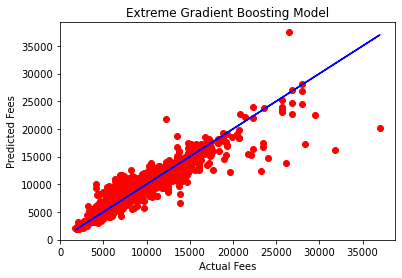

In [111]:
plt.scatter(x=yvalid,y=p,color='r')
plt.plot(yvalid,yvalid,color='b')
plt.xlabel('Actual Fees')
plt.ylabel('Predicted Fees')
plt.title('Extreme Gradient Boosting Model')

# Saving the Model

In [112]:
import joblib
joblib.dump(model,'Flight_price.obj')

['Flight_price.obj']

# Predicting the Test Dataset

In [113]:
predictions=model.predict(test)

In [114]:
predictions=pd.DataFrame(predictions,columns=['Price'])

In [115]:
predictions

,Price
0,13619.424805
1,4525.895996
2,12635.946289
3,11046.975586
4,3916.917969
...,...
2666,10188.939453
2667,4724.677734
2668,16971.025391
2669,12311.001953


In [116]:
predictions.to_csv('test_predictions.csv')